In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_excel("2024_Accidentalidad.xlsx", engine="openpyxl")

df.describe

<bound method NDFrame.describe of       num_expediente      fecha      hora  \
0        2023S040280 2024-01-04  14:09:00   
1        2023S040280 2024-01-04  14:09:00   
2        2023S040309 2024-02-15  14:05:00   
3        2023S040309 2024-02-15  14:05:00   
4        2023S040310 2024-02-18  10:40:00   
...              ...        ...       ...   
49335    2024S035474 2024-12-23  11:35:00   
49336    2024S035479 2024-12-03  09:45:00   
49337    2024S035479 2024-12-03  09:45:00   
49338    2024S035480 2024-12-29  19:15:00   
49339    2024S035480 2024-12-29  19:15:00   

                                   localizacion numero  cod_distrito  \
0      AVDA. NICETO ALCALA ZAMORA / AUTOV. M-11      3            16   
1      AVDA. NICETO ALCALA ZAMORA / AUTOV. M-11      3            16   
2                    CALL. TESORO / CALL. MINAS     18             1   
3                    CALL. TESORO / CALL. MINAS     18             1   
4        GTA. RUIZ JIMENEZ / CALL. SAN BERNARDO      3           

In [46]:
df.head()

,num_expediente,fecha,hora,localizacion,numero,cod_distrito,distrito,tipo_accidente,estado_meteorológico,tipo_vehiculo,tipo_persona,rango_edad,sexo,cod_lesividad,lesividad,coordenada_x_utm,coordenada_y_utm,positiva_alcohol,positiva_droga
0,2023S040280,2024-01-04,14:09:00,AVDA. NICETO ALCALA ZAMORA / AUTOV. M-11,3,16,HORTALEZA,Colisión fronto-lateral,Lluvia débil,Motocicleta > 125cc,Conductor,De 55 a 59 años,Hombre,2.0,Ingreso inferior o igual a 24 horas,444913.056,4481427.179,N,NaN
1,2023S040280,2024-01-04,14:09:00,AVDA. NICETO ALCALA ZAMORA / AUTOV. M-11,3,16,HORTALEZA,Colisión fronto-lateral,Lluvia débil,Turismo,Conductor,De 55 a 59 años,Mujer,14.0,Sin asistencia sanitaria,444913.056,4481427.179,N,NaN
2,2023S040309,2024-02-15,14:05:00,CALL. TESORO / CALL. MINAS,18,1,CENTRO,Colisión fronto-lateral,Lluvia débil,Bicicleta,Conductor,De 25 a 29 años,Hombre,7.0,Asistencia sanitaria sólo en el lugar del acci...,440122.814,4475169.548,N,NaN
3,2023S040309,2024-02-15,14:05:00,CALL. TESORO / CALL. MINAS,18,1,CENTRO,Colisión fronto-lateral,Lluvia débil,Motocicleta hasta 125cc,Conductor,De 35 a 39 años,Hombre,14.0,Sin asistencia sanitaria,440122.814,4475169.548,N,NaN
4,2023S040310,2024-02-18,10:40:00,GTA. RUIZ JIMENEZ / CALL. SAN BERNARDO,3,7,CHAMBERÍ,Colisión lateral,Despejado,Turismo,Conductor,De 25 a 29 años,Hombre,NaN,NaN,440136.981,4475721.316,N,NaN


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49340 entries, 0 to 49339
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   num_expediente        49340 non-null  object        
 1   fecha                 49340 non-null  datetime64[ns]
 2   hora                  49340 non-null  object        
 3   localizacion          49340 non-null  object        
 4   numero                49340 non-null  object        
 5   cod_distrito          49340 non-null  int64         
 6   distrito              49340 non-null  object        
 7   tipo_accidente        49335 non-null  object        
 8   estado_meteorológico  43424 non-null  object        
 9   tipo_vehiculo         48946 non-null  object        
 10  tipo_persona          49340 non-null  object        
 11  rango_edad            49340 non-null  object        
 12  sexo                  49340 non-null  object        
 13  cod_lesividad   

In [47]:
#Lo primero que podemos visualizar es que los tipos de las columnas en el dataframe son distintos de los que se supone que deberían
#Por lo tanto procederemos a transformarlos
df['hora']=pd.to_datetime(df['hora'], format = '%H:%M:%S').dt.time
df['positiva_droga'] = df['positiva_droga'] == 1
df['positiva_alcohol'] = df['positiva_alcohol'] == 'S'
df.dtypes

num_expediente                  object
fecha                   datetime64[ns]
hora                            object
localizacion                    object
numero                          object
cod_distrito                     int64
distrito                        object
tipo_accidente                  object
estado_meteorológico            object
tipo_vehiculo                   object
tipo_persona                    object
rango_edad                      object
sexo                            object
cod_lesividad                  float64
lesividad                       object
coordenada_x_utm               float64
coordenada_y_utm               float64
positiva_alcohol                  bool
positiva_droga                    bool
dtype: object

In [48]:
#Revisaremos la cantidad de NaN
df.isnull().sum()

num_expediente              0
fecha                       0
hora                        0
localizacion                0
numero                      0
cod_distrito                0
distrito                    0
tipo_accidente              5
estado_meteorológico     5916
tipo_vehiculo             394
tipo_persona                0
rango_edad                  0
sexo                        0
cod_lesividad           21996
lesividad               21996
coordenada_x_utm            6
coordenada_y_utm            6
positiva_alcohol            0
positiva_droga              0
dtype: int64

In [65]:
#Como hay muchos valores faltantes, en base al archivo pdf que hay los rellenaremos dependiendo lo que signifiquen
df['tipo_accidente'] = df['tipo_accidente'].fillna("Otro")
df['estado_meteorológico'] = df['estado_meteorológico'].fillna("Se desconoce")
df['tipo_vehiculo'] = df['tipo_vehiculo'].fillna("Sin especificar")
df['cod_lesividad'] = df['cod_lesividad'].fillna(14)
df['lesividad'] = df['lesividad'].fillna("Sin asistencia sanitaria")
df['coordenada_x_utm'] = df['coordenada_x_utm'].fillna(0)
df['coordenada_y_utm'] = df['coordenada_y_utm'].fillna(0)

df.isnull().sum()

num_expediente          0
fecha                   0
hora                    0
localizacion            0
numero                  0
cod_distrito            0
distrito                0
tipo_accidente          0
estado_meteorológico    0
tipo_vehiculo           0
tipo_persona            0
rango_edad              0
sexo                    0
cod_lesividad           0
lesividad               0
coordenada_x_utm        0
coordenada_y_utm        0
positiva_alcohol        0
positiva_droga          0
dtype: int64

In [52]:
df.head()

,num_expediente,fecha,hora,localizacion,numero,cod_distrito,distrito,tipo_accidente,estado_meteorológico,tipo_vehiculo,tipo_persona,rango_edad,sexo,cod_lesividad,lesividad,coordenada_x_utm,coordenada_y_utm,positiva_alcohol,positiva_droga
0,2023S040280,2024-01-04,14:09:00,AVDA. NICETO ALCALA ZAMORA / AUTOV. M-11,3,16,HORTALEZA,Colisión fronto-lateral,Lluvia débil,Motocicleta > 125cc,Conductor,De 55 a 59 años,Hombre,2.0,Ingreso inferior o igual a 24 horas,444913.056,4481427.179,False,False
1,2023S040280,2024-01-04,14:09:00,AVDA. NICETO ALCALA ZAMORA / AUTOV. M-11,3,16,HORTALEZA,Colisión fronto-lateral,Lluvia débil,Turismo,Conductor,De 55 a 59 años,Mujer,14.0,Sin asistencia sanitaria,444913.056,4481427.179,False,False
2,2023S040309,2024-02-15,14:05:00,CALL. TESORO / CALL. MINAS,18,1,CENTRO,Colisión fronto-lateral,Lluvia débil,Bicicleta,Conductor,De 25 a 29 años,Hombre,7.0,Asistencia sanitaria sólo en el lugar del acci...,440122.814,4475169.548,False,False
3,2023S040309,2024-02-15,14:05:00,CALL. TESORO / CALL. MINAS,18,1,CENTRO,Colisión fronto-lateral,Lluvia débil,Motocicleta hasta 125cc,Conductor,De 35 a 39 años,Hombre,14.0,Sin asistencia sanitaria,440122.814,4475169.548,False,False
4,2023S040310,2024-02-18,10:40:00,GTA. RUIZ JIMENEZ / CALL. SAN BERNARDO,3,7,CHAMBERÍ,Colisión lateral,Despejado,Turismo,Conductor,De 25 a 29 años,Hombre,14.0,Sin asistencia,440136.981,4475721.316,False,False


Ahora estamos listos para empezar a fijarnos en una variable de interes a estudiar, graficaremos para los accidentes por distrito, 

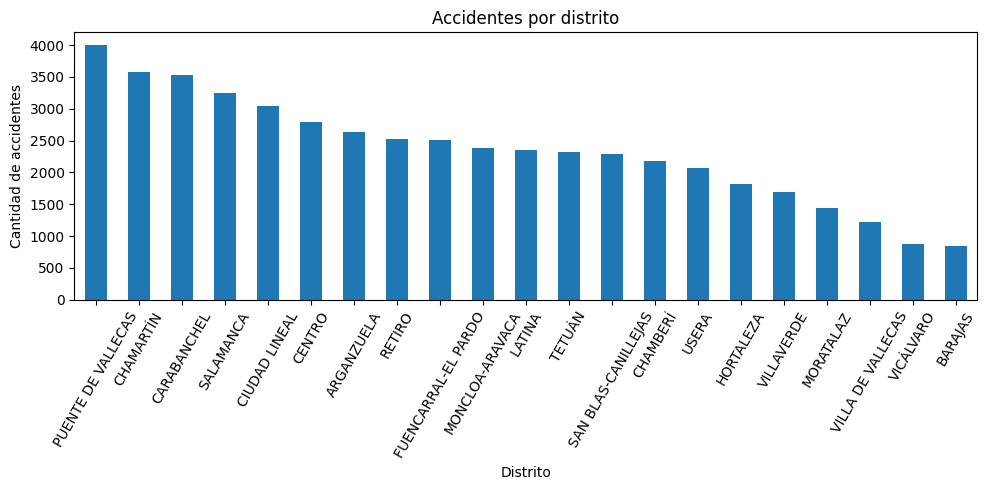

In [54]:
df['distrito'].value_counts().plot(kind='bar', figsize=(10,5), title='Accidentes por distrito')
plt.xlabel('Distrito')
plt.ylabel('Cantidad de accidentes')
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

Podemos decir que en el distrito de Puente de vallecas es donde hubieron mas accidentes en el año 2024

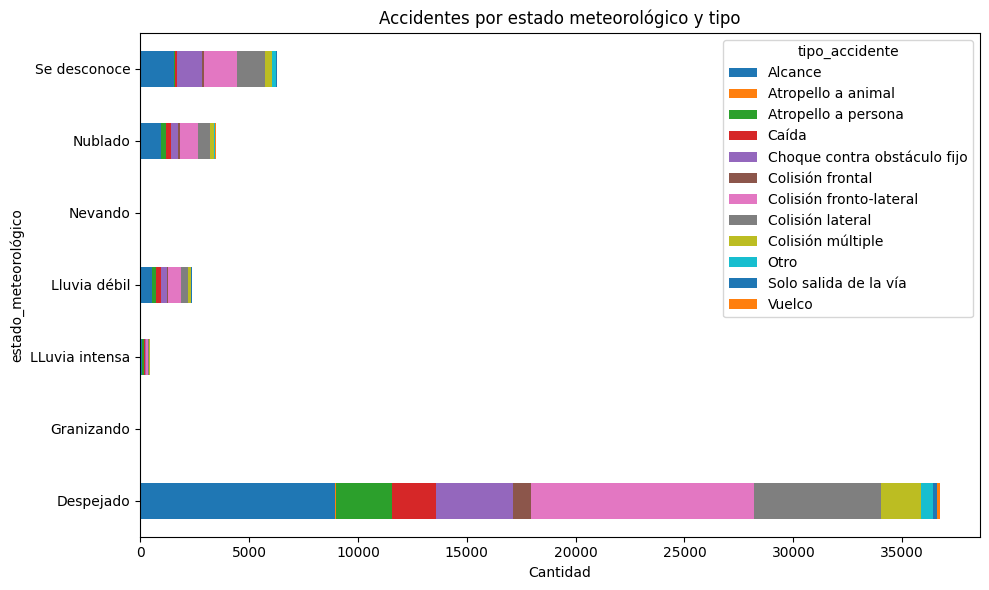

In [59]:
#Tambien graficaremos para ver si la condicion meteorológica tiene relación con el tipo de accidente
pd.crosstab(df['estado_meteorológico'], df['tipo_accidente']).plot(kind='barh', stacked=True, figsize=(10,6))
plt.title('Accidentes por estado meteorológico y tipo')
plt.xlabel('Cantidad')
plt.tight_layout()
plt.show()

Podemos decir entonces que las colisiones fronto-laterales son frecuentes, en cualquier clima donde se haya registrado un accidente. Tambien podemos ver que los accidentes por alcance y por colisión fronto-lateral lideran la cantidad de choques

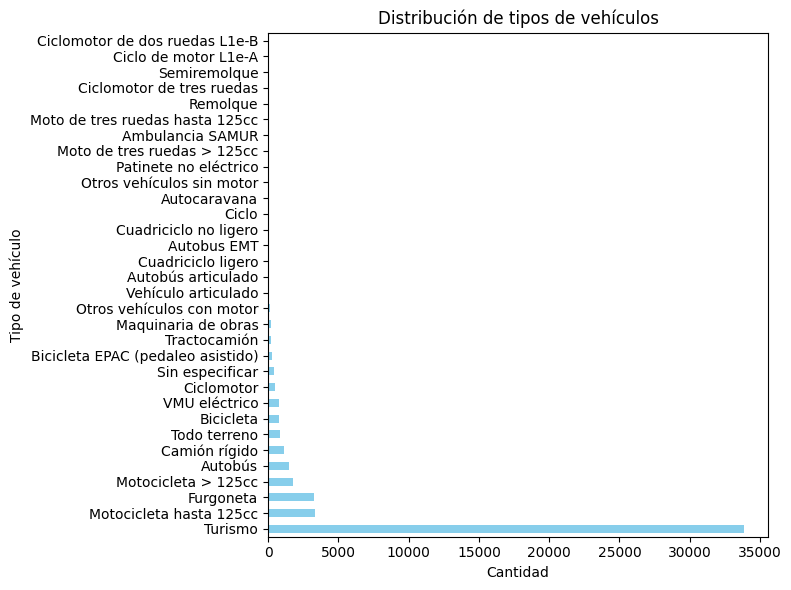

In [75]:
#Accidentes por tipo de vehículos
df['tipo_vehiculo'].value_counts().plot(
    kind='barh', figsize=(8,6), color='skyblue'
)
plt.title('Distribución de tipos de vehículos')
plt.xlabel('Cantidad')
plt.ylabel('Tipo de vehículo')
plt.tight_layout()
plt.show()


Si Turismo se refiere a autos extranjeros o autos arrendados, entonces podemos darnos cuenta que una parte muy importante de los accidentes es debido al turismo.

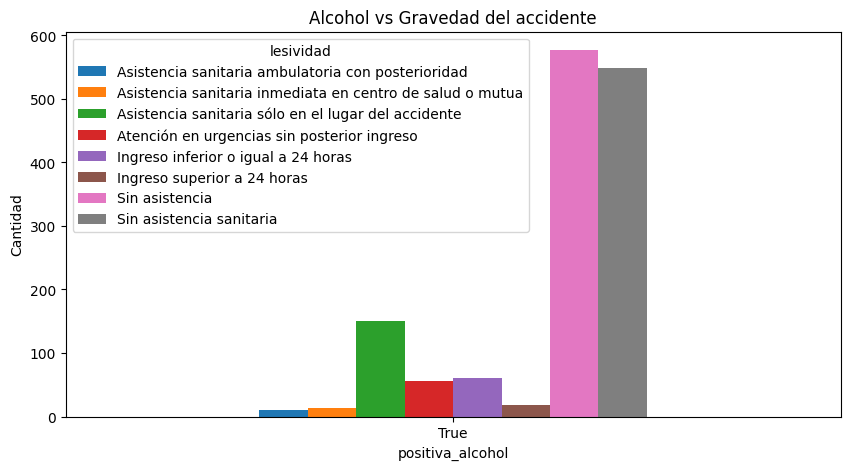

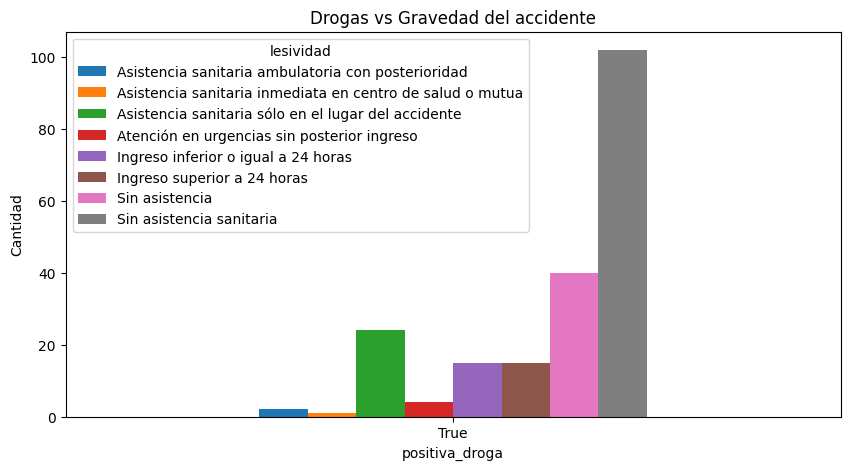

In [66]:
#Veamos la relación de alcohol y drogas vs la gravedad de los accidentes
df_alcohol = df[df['positiva_alcohol'] == True]

pd.crosstab(df_alcohol['positiva_alcohol'], df['lesividad']).plot(kind='bar', figsize=(10,5), title='Alcohol vs Gravedad del accidente')
plt.ylabel('Cantidad')
plt.xticks(rotation=0)
plt.show()

df_droga = df[df['positiva_droga'] == True]
pd.crosstab(df_droga['positiva_droga'], df['lesividad']).plot(kind='bar', figsize=(10,5), title='Drogas vs Gravedad del accidente')
plt.ylabel('Cantidad')
plt.xticks(rotation=0)
plt.show()


Del cual podemos visualizar que no hay una relación entre la gravedad de los accidentes debido a que se hayan consumido drogas o alcohol.

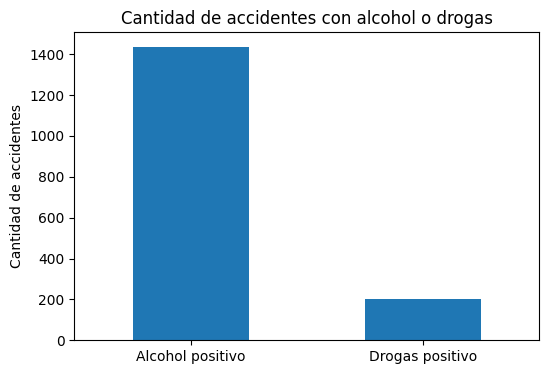

In [67]:
#Total de accidentes por drogas y alcohol positivos

alcohol_true = df['positiva_alcohol'].sum()
droga_true = df['positiva_droga'].sum()

pd.Series({'Alcohol positivo': alcohol_true, 'Drogas positivo': droga_true}).plot(
    kind='bar', title='Cantidad de accidentes con alcohol o drogas', figsize=(6,4)
)
plt.ylabel('Cantidad de accidentes')
plt.xticks(rotation=0)
plt.show()


Donde podemos ver que el consumo de alcohol tiende a producir mas accidentes en comparación con el consumo de drogas

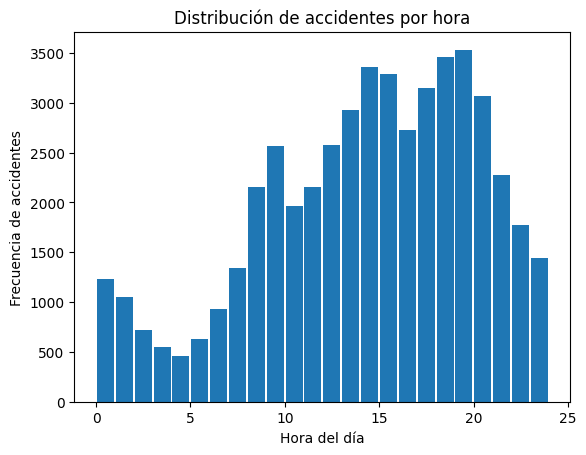

In [71]:
#Tambien podemos ver la distribución de accidentes por hora
df['hora_decimal'] = df['hora'].apply(lambda x: x.hour + x.minute / 60)

df['hora_decimal'].plot(kind='hist', bins=24, rwidth=0.9, title='Distribución de accidentes por hora')
plt.xlabel('Hora del día')
plt.ylabel('Frecuencia de accidentes')
plt.show()


Podemos inferir que una de las razones por las cuales hay mas accidentes desde las 15:00 hasta las 20:00 debido a que las personas buscan al colegio a los niños y/o salen del trabajo.

In [76]:
print(df['lesividad'].unique())

['Ingreso inferior o igual a 24 horas' 'Sin asistencia sanitaria'
 'Asistencia sanitaria sólo en el lugar del accidente' 'Sin asistencia'
 'Atención en urgencias sin posterior ingreso'
 'Ingreso superior a 24 horas'
 'Asistencia sanitaria inmediata en centro de salud o mutua'
 'Asistencia sanitaria ambulatoria con posterioridad' 'Fallecido 24 horas'
 'Se desconoce']


Cantidad de accidentes con fallecidos: 29


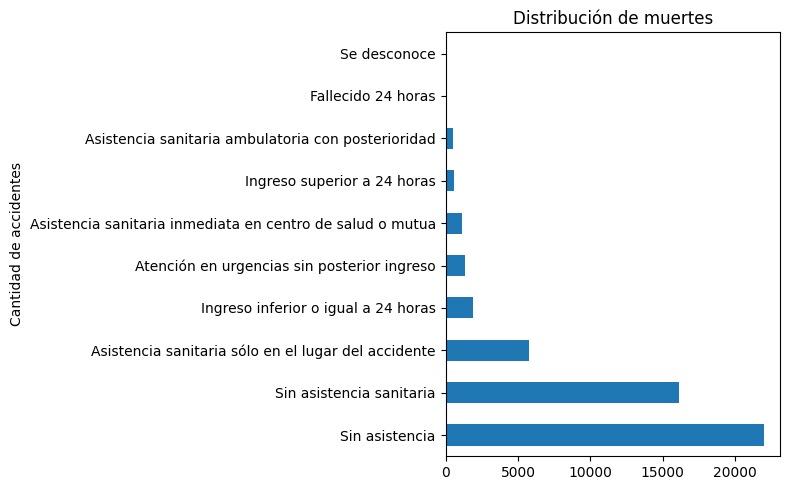

In [79]:
muertes = df[df['lesividad'] == 'Fallecido 24 horas']

print("Cantidad de accidentes con fallecidos:", len(muertes))

df['lesividad'].value_counts().plot(
    kind='barh', figsize=(8,5), title='Distribución de muertes'
)
plt.ylabel('Cantidad de accidentes')
plt.tight_layout()
plt.show()

Del siguiente grafico podemos concluir que la mayoría de accidentes ocurre sin asistencia de personal medico o asistencia sanitaria en el lugar del accidente.

Uno de los mayores desafios al realizar este estudio no fue definir como tratar los valores NaN, debido a que en el archivo pdf adjuntado se tenían las definiciones por varias de las columnas descritas se pudo saber con facilidad que hacer con esos valores y como rellenarlos, el desafío mas grande fue la generación de gráficos para poder expresar de manera correcta los datos, y que no se superpusieran entre si al ser tantos datos y tantas variables de estudio. Se puede ver como fueron abordados en cada comentario y gráfico hecho en esta tarea.